In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style FIRST
sns.set_style("whitegrid")

# THEN set font configuration (this must come AFTER seaborn)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Liberation Serif', 'Times']
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['lines.linewidth'] = 2.5

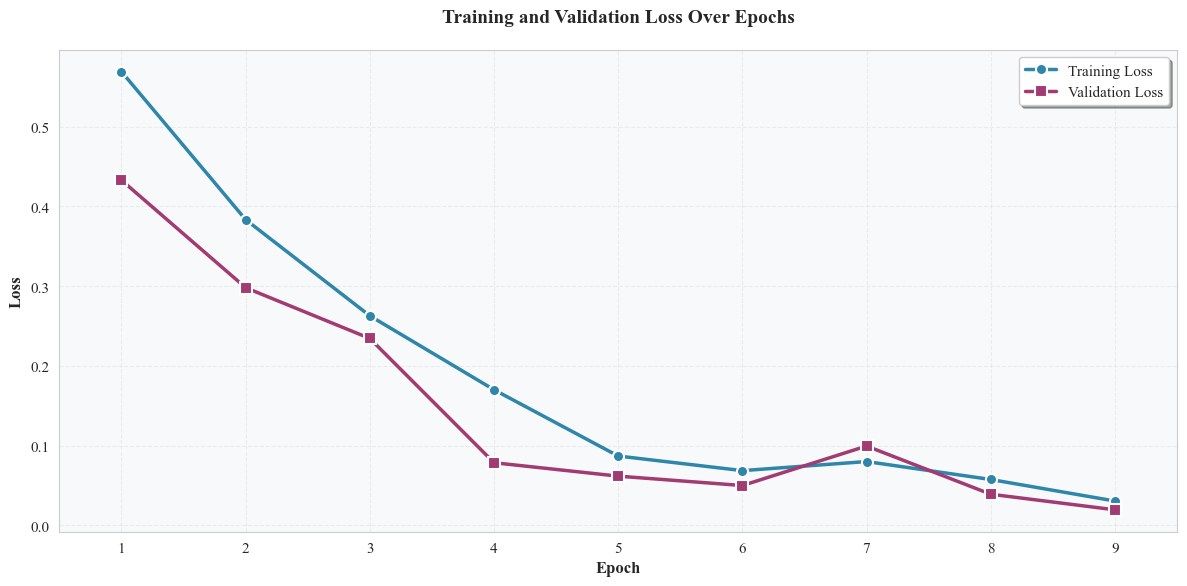

Figure saved as 'training_validation_loss.png'


In [4]:
# Read the training history
df = pd.read_csv('training_history.csv')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot training and validation loss
epochs = range(1, len(df) + 1)
ax.plot(epochs, df['train_loss'], 'o-', label='Training Loss', 
        color='#2E86AB', markersize=8, markeredgewidth=1.5, markeredgecolor='white')
ax.plot(epochs, df['val_loss'], 's-', label='Validation Loss', 
        color='#A23B72', markersize=8, markeredgewidth=1.5, markeredgecolor='white')

# Customize the plot
ax.set_xlabel('Epoch', fontweight='bold')
ax.set_ylabel('Loss', fontweight='bold')
ax.set_title('Training and Validation Loss Over Epochs', fontweight='bold', pad=20)
ax.legend(loc='upper right', frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(0.5, len(df) + 0.5)
ax.set_xticks(epochs)

# Add subtle background
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

# Optional: Save the figure
fig.savefig('training_validation_loss.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Figure saved as 'training_validation_loss.png'")


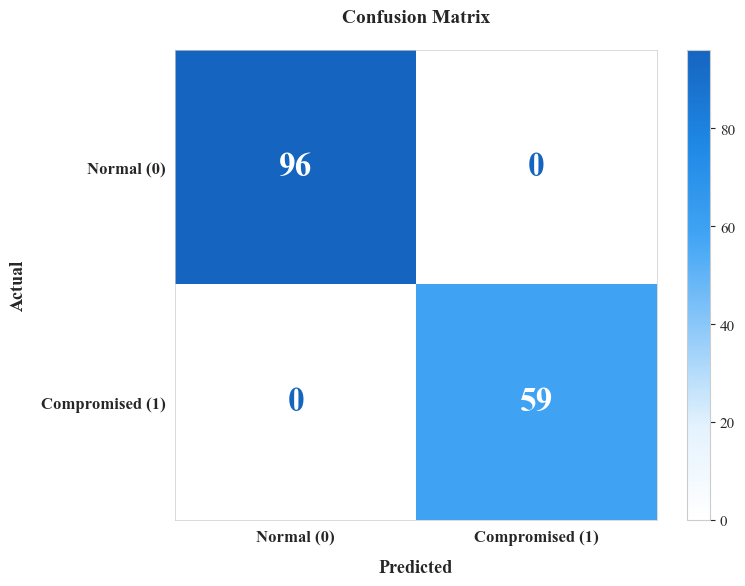

Confusion matrix saved as 'confusion_matrix.png'


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load or generate your predictions and true labels
# Replace these with your actual data
# For example:
# y_true = np.load('true_labels.npy')
# y_pred = np.load('predictions.npy')

# Example data (replace with your actual predictions)
# Assuming you have binary classification (0: normal, 1: compromised)
y_true = np.array([0] * 96 + [1] * 59)  # Based on your confusion matrix image
y_pred = np.array([0] * 96 + [1] * 59)  # Perfect predictions for demonstration

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create professional color gradient (white to deep blue)
# Professional academic color scheme
colors_list = ['#FFFFFF', '#E3F2FD', '#90CAF9', '#42A5F5', '#1E88E5', '#1565C0']
n_bins = 256
cmap = LinearSegmentedColormap.from_list('professional_blue', colors_list, N=n_bins)

# Create the confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create heatmap with custom colormap - no grid lines
im = ax.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=11)

# Set ticks and labels
classes = ['Normal (0)', 'Compromised (1)']  # Adjust based on your classes
tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes, fontsize=12, fontweight='bold')
ax.set_yticklabels(classes, fontsize=12, fontweight='bold')

# Remove all grid lines
ax.grid(False)

# Add text annotations
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "#1565C0",
                fontsize=24, fontweight='bold')

# Labels and title
ax.set_xlabel('Predicted', fontsize=13, fontweight='bold', labelpad=10)
ax.set_ylabel('Actual', fontsize=13, fontweight='bold', labelpad=10)
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold', pad=20)

# Clean white background
fig.patch.set_facecolor('white')

# Add subtle border to cells
for edge, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('#CCCCCC')
    spine.set_linewidth(0.5)

# Tight layout
plt.tight_layout()

# Display
plt.show()

# Save figure
fig.savefig('results/confusion_matrix.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Confusion matrix saved as 'confusion_matrix.png'")
